In [1]:
#https://www.kaggle.com/datasets/waqi786/youth-smoking-and-drug-dataset


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from sklearn.metrics import roc_curve, roc_auc_score



#open file, print top rows to know it worked
file_path = r"C:\Users\Precious\Downloads\youth_smoking_drug_data_10000_rows_expanded.csv"
df = pd.read_csv(file_path)
print(df.head())

   Year Age_Group  Gender  Smoking_Prevalence  Drug_Experimentation  \
0  2024     15-19    Both               18.85                 32.40   
1  2024     10-14  Female               34.88                 41.57   
2  2023     10-14    Both               42.00                 56.80   
3  2024     40-49    Both               33.75                 42.90   
4  2023     15-19    Male               47.90                 39.62   

  Socioeconomic_Status  Peer_Influence School_Programs  Family_Background  \
0                 High               5             Yes                  1   
1                 High               6             Yes                 10   
2                 High               6             Yes                  2   
3               Middle              10              No                  9   
4                 High               1              No                  2   

   Mental_Health Access_to_Counseling  Parental_Supervision  \
0              5                   No          

In [3]:
#gaather datatypes
df.info()
#check null values
#df.isnull()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  10000 non-null  int64  
 1   Age_Group             10000 non-null  object 
 2   Gender                10000 non-null  object 
 3   Smoking_Prevalence    10000 non-null  float64
 4   Drug_Experimentation  10000 non-null  float64
 5   Socioeconomic_Status  10000 non-null  object 
 6   Peer_Influence        10000 non-null  int64  
 7   School_Programs       10000 non-null  object 
 8   Family_Background     10000 non-null  int64  
 9   Mental_Health         10000 non-null  int64  
 10  Access_to_Counseling  10000 non-null  object 
 11  Parental_Supervision  10000 non-null  int64  
 12  Substance_Education   10000 non-null  object 
 13  Community_Support     10000 non-null  int64  
 14  Media_Influence       10000 non-null  int64  
dtypes: float64(2), int64

Year                    0
Age_Group               0
Gender                  0
Smoking_Prevalence      0
Drug_Experimentation    0
Socioeconomic_Status    0
Peer_Influence          0
School_Programs         0
Family_Background       0
Mental_Health           0
Access_to_Counseling    0
Parental_Supervision    0
Substance_Education     0
Community_Support       0
Media_Influence         0
dtype: int64

In [5]:
#Coulumn counts
#categorical columns =
#print(categorical_columns)
categorical_columns = df.select_dtypes(include=['object']).columns

print(categorical_columns)

value_counts = df[categorical_columns].apply(pd.Series.value_counts)
print(value_counts)

for col in categorical_columns:
    print(f"{col}:\n{df[col].value_counts()}\n")


Index(['Age_Group', 'Gender', 'Socioeconomic_Status', 'School_Programs',
       'Access_to_Counseling', 'Substance_Education'],
      dtype='object')
        Age_Group  Gender  Socioeconomic_Status  School_Programs  \
10-14      1007.0     NaN                   NaN              NaN   
15-19      1014.0     NaN                   NaN              NaN   
20-24      1045.0     NaN                   NaN              NaN   
25-29       974.0     NaN                   NaN              NaN   
30-39      1021.0     NaN                   NaN              NaN   
40-49      1001.0     NaN                   NaN              NaN   
50-59      1001.0     NaN                   NaN              NaN   
60-69      1020.0     NaN                   NaN              NaN   
70-79       938.0     NaN                   NaN              NaN   
80+         979.0     NaN                   NaN              NaN   
Both          NaN  3415.0                   NaN              NaN   
Female        NaN  3291.0         

In [7]:
#mean, median, mode


# Calculate mean
drug_exp_mean = df['Drug_Experimentation'].mean()
smoking_prev_mean = df['Smoking_Prevalence'].mean()

# Calculate median
drug_exp_median = df['Drug_Experimentation'].median()
smoking_prev_median = df['Smoking_Prevalence'].median()

# Calculate mode
drug_exp_mode = df['Drug_Experimentation'].mode()[0]
smoking_prev_mode = df['Smoking_Prevalence'].mode()[0]

# Display the results
print("Drug Experimentation:")
print(f"  Mean: {drug_exp_mean}")
print(f"  Median: {drug_exp_median}")
print(f"  Mode: {drug_exp_mode}")

print("\nSmoking Prevalence:")
print(f"  Mean: {smoking_prev_mean}")
print(f"  Median: {smoking_prev_median}")
print(f"  Mode: {smoking_prev_mode}")

Drug Experimentation:
  Mean: 40.150181999999994
  Median: 40.1
  Mode: 34.97

Smoking Prevalence:
  Mean: 27.439257
  Median: 27.355
  Mode: 23.54


In [9]:

# Calculate summary statistics
summary_stats = df.groupby('Access_to_Counseling')[['Smoking_Prevalence', 'Drug_Experimentation']].agg(['mean', 'median', 'std', 'min', 'max'])

# Print the summary statistics
print(summary_stats)

                     Smoking_Prevalence                                 \
                                   mean median        std   min    max   
Access_to_Counseling                                                     
No                            27.493782  27.34  13.054899  5.01  49.98   
Yes                           27.382846  27.41  12.893982  5.00  50.00   

                     Drug_Experimentation                                  
                                     mean median        std    min    max  
Access_to_Counseling                                                       
No                              40.217394  40.36  17.544871  10.00  69.96  
Yes                             40.080645  39.80  17.487425  10.02  69.99  


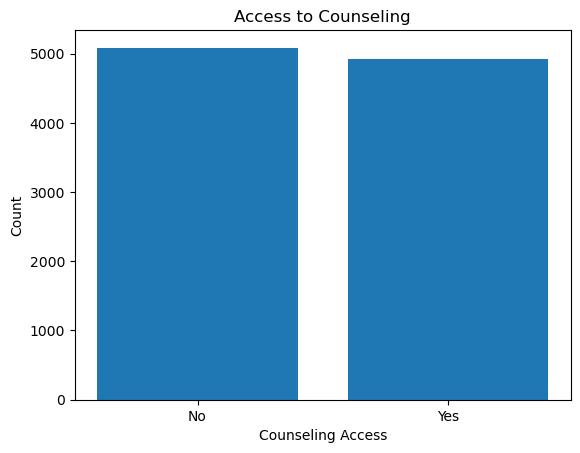

In [11]:
#visualize distributions of access to counseing
# Count the occurrences of 'yes' and 'no'
counts = df['Access_to_Counseling'].value_counts()

# Create the bar chart
plt.bar(counts.index, counts.values)

# Add labels and title
plt.xlabel("Counseling Access")
plt.ylabel("Count")
plt.title("Access to Counseling")

# Show the chart
plt.show()

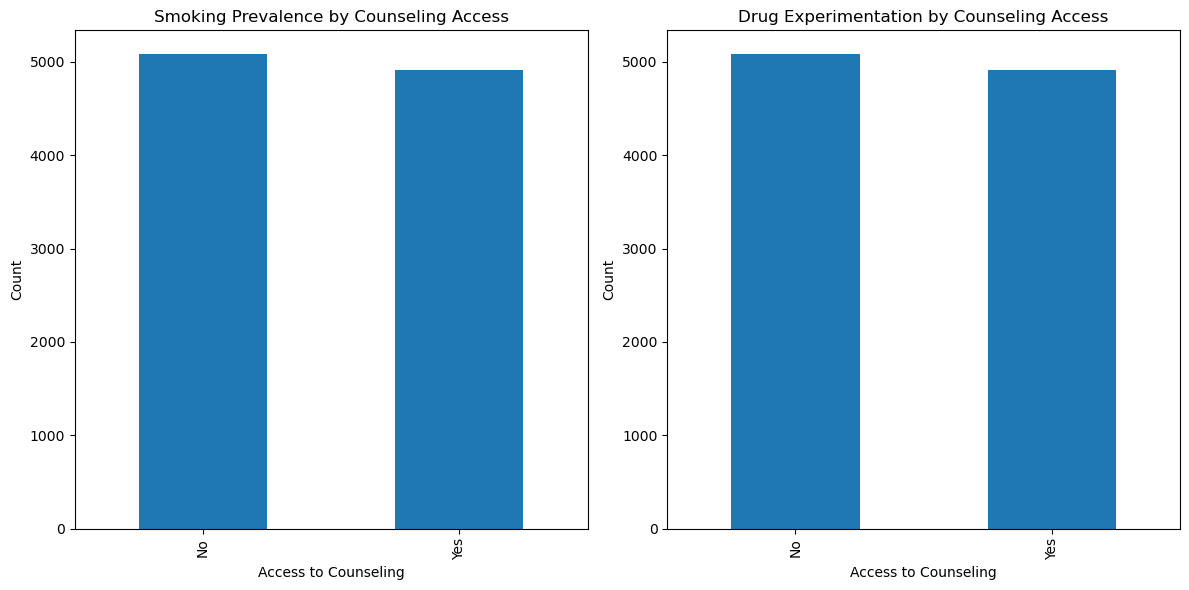

In [12]:
#visualize distribution of smoking prevalence and drug experimentation grouped by access to counseling

# Group data by counseling access and calculate count
grouped_data = df.groupby('Access_to_Counseling').agg(
    smoking_count=('Smoking_Prevalence', 'count'),
    drug_experimentation_count=('Drug_Experimentation', 'count')
)

# Create bar charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

grouped_data['smoking_count'].plot(kind='bar', ax=axes[0])
axes[0].set_title('Smoking Prevalence by Counseling Access')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Access to Counseling')

grouped_data['drug_experimentation_count'].plot(kind='bar', ax=axes[1])
axes[1].set_title('Drug Experimentation by Counseling Access')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Access to Counseling')

plt.tight_layout()
plt.show()

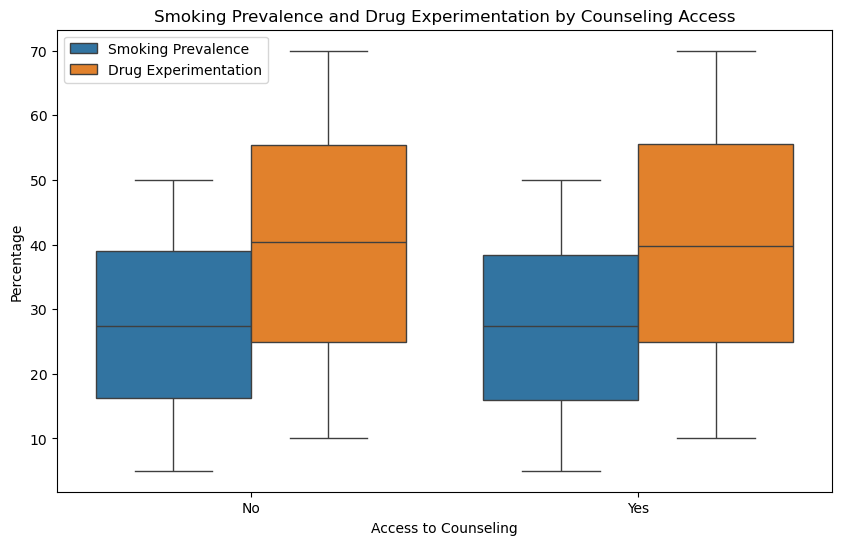

In [13]:
#Box plot

# Melt the DataFrame
melted_df = pd.melt(df, id_vars=['Access_to_Counseling'],
                    value_vars=['Smoking_Prevalence', 'Drug_Experimentation'],
                    var_name='Variable', value_name='Value')

# Create side-by-side box plots
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Access_to_Counseling', y='Value', hue='Variable', data=melted_df)
plt.title('Smoking Prevalence and Drug Experimentation by Counseling Access')
plt.ylabel('Percentage')
plt.xlabel('Access to Counseling')

# Get legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Modify legend labels to remove underscores
new_labels = [label.replace('_', ' ') for label in labels]

# Set new legend labels
ax.legend(handles, new_labels)

plt.show()

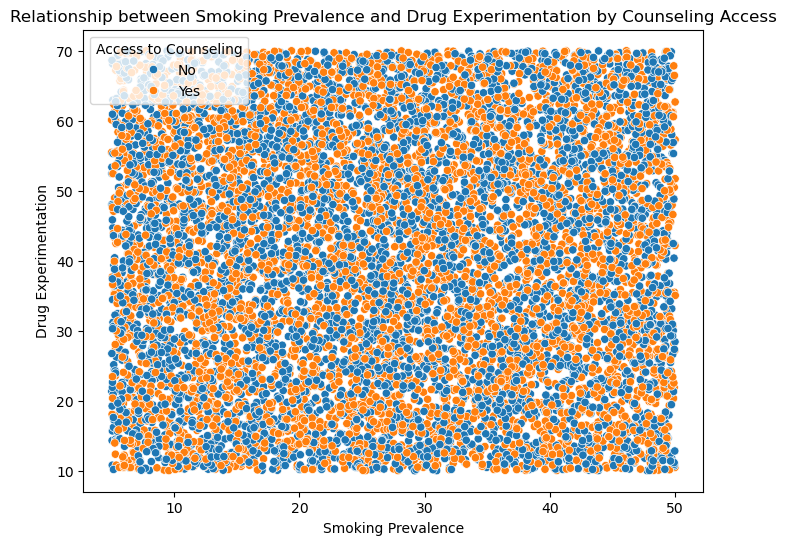

In [14]:
#Scater plot

# Create scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.scatterplot(x='Smoking_Prevalence', y='Drug_Experimentation', hue='Access_to_Counseling', data=df)
plt.title('Relationship between Smoking Prevalence and Drug Experimentation by Counseling Access')
plt.xlabel('Smoking Prevalence')
plt.ylabel('Drug Experimentation')

# Get legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Modify legend labels to remove underscores
new_labels = [label.replace('_', ' ') for label in labels]

# Set new legend labels
plt.gca().legend(handles, new_labels, title="Access to Counseling")

plt.show()

In [15]:
# Chi-Square

# Create contingency table for Smoking_Prevalence and Access_to_Counseling
contingency_table_smoking = pd.crosstab(df['Smoking_Prevalence'], df['Access_to_Counseling'])

# Perform Chi-square test for Smoking_Prevalence
chi2_stat_smoking, p_val_smoking, dof_smoking, expected_smoking = chi2_contingency(contingency_table_smoking)

# Print results for Smoking_Prevalence
print("Chi-square test for Smoking_Prevalence and Access_to_Counseling:")
print(f"Chi-square statistic: {chi2_stat_smoking}")
print(f"P-value: {p_val_smoking}")
print(f"Degrees of freedom: {dof_smoking}")


# Create contingency table for Drug_Experimentation and Access_to_Counseling
contingency_table_drug = pd.crosstab(df['Drug_Experimentation'], df['Access_to_Counseling'])

# Perform Chi-square test for Drug_Experimentation
chi2_stat_drug, p_val_drug, dof_drug, expected_drug = chi2_contingency(contingency_table_drug)

# Print results for Drug_Experimentation
print("\nChi-square test for Drug_Experimentation and Access_to_Counseling:")
print(f"Chi-square statistic: {chi2_stat_drug}")
print(f"P-value: {p_val_drug}")
print(f"Degrees of freedom: {dof_drug}")

Chi-square test for Smoking_Prevalence and Access_to_Counseling:
Chi-square statistic: 3974.4221000504067
P-value: 0.5707752887568869
Degrees of freedom: 3991

Chi-square test for Drug_Experimentation and Access_to_Counseling:
Chi-square statistic: 4825.1346226361
P-value: 0.5694500257399927
Degrees of freedom: 4843


In [17]:
#T-test

# Separate data for Access_to_Counseling: 'yes' and 'no'
smoking_yes = df[df['Access_to_Counseling'] == 'Yes']['Smoking_Prevalence']
smoking_no = df[df['Access_to_Counseling'] == 'No']['Smoking_Prevalence']
drug_yes = df[df['Access_to_Counseling'] == 'Yes']['Drug_Experimentation']
drug_no = df[df['Access_to_Counseling'] == 'No']['Drug_Experimentation']

# Perform t-test for Smoking_Prevalence
t_statistic_smoking, p_value_smoking = ttest_ind(smoking_yes, smoking_no)

# Print results for Smoking_Prevalence
print("T-test for Smoking_Prevalence and Access_to_Counseling:")
print(f"T-statistic: {t_statistic_smoking}")
print(f"P-value: {p_value_smoking}")

# Perform t-test for Drug_Experimentation
t_statistic_drug, p_value_drug = ttest_ind(drug_yes, drug_no)

# Print results for Drug_Experimentation
print("\nT-test for Drug_Experimentation and Access_to_Counseling:")
print(f"T-statistic: {t_statistic_drug}")
print(f"P-value: {p_value_drug}")


T-test for Smoking_Prevalence and Access_to_Counseling:
T-statistic: -0.42739979981466253
P-value: 0.6690973575325204

T-test for Drug_Experimentation and Access_to_Counseling:
T-statistic: -0.3902843742038173
P-value: 0.6963345911237562


In [19]:
#ANOVA

# Separate data for Access_to_Counseling: 'yes' and 'no'
smoking_yes = df[df['Access_to_Counseling'] == 'Yes']['Smoking_Prevalence']
smoking_no = df[df['Access_to_Counseling'] == 'No']['Smoking_Prevalence']
drug_yes = df[df['Access_to_Counseling'] == 'Yes']['Drug_Experimentation']
drug_no = df[df['Access_to_Counseling'] == 'No']['Drug_Experimentation']

# Perform ANOVA for Smoking_Prevalence
f_statistic_smoking, p_value_smoking = f_oneway(smoking_yes, smoking_no)

# Print results for Smoking_Prevalence
print("ANOVA for Smoking_Prevalence and Access_to_Counseling:")
print(f"F-statistic: {f_statistic_smoking}")
print(f"P-value: {p_value_smoking}")

# Perform ANOVA for Drug_Experimentation
f_statistic_drug, p_value_drug = f_oneway(drug_yes, drug_no)

# Print results for Drug_Experimentation
print("\nANOVA for Drug_Experimentation and Access_to_Counseling:")
print(f"F-statistic: {f_statistic_drug}")
print(f"P-value: {p_value_drug}")

ANOVA for Smoking_Prevalence and Access_to_Counseling:
F-statistic: 0.18267058888161153
P-value: 0.6690973575325012

ANOVA for Drug_Experimentation and Access_to_Counseling:
F-statistic: 0.15232189274764926
P-value: 0.6963345911239947


In [25]:
#Logistic Regression
# Define features (X) and target (y)
X = df[['Smoking_Prevalence', 'Drug_Experimentation']]
y = df['Access_to_Counseling']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)  # Add zero_division=1

# Print results
print("Logistic Regression Model Results:")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Logistic Regression Model Results:
Accuracy: 0.504
Classification Report:
              precision    recall  f1-score   support

          No       0.50      1.00      0.67      1008
         Yes       1.00      0.00      0.00       992

    accuracy                           0.50      2000
   macro avg       0.75      0.50      0.34      2000
weighted avg       0.75      0.50      0.34      2000



C:\Users\Precious\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


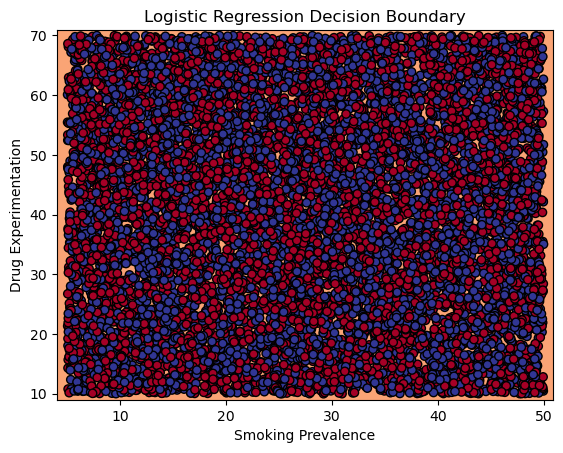

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Define features (X) and target (y)
X = df[['Smoking_Prevalence', 'Drug_Experimentation']]
y = df['Access_to_Counseling'].map({'Yes': 1, 'No': 0})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Create meshgrid for plotting
x_min, x_max = X[['Smoking_Prevalence']].values.min() - 1, X[['Smoking_Prevalence']].values.max() + 1
y_min, y_max = X[['Drug_Experimentation']].values.min() - 1, X[['Drug_Experimentation']].values.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict probabilities for meshgrid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X[['Smoking_Prevalence']], X[['Drug_Experimentation']], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.xlabel('Smoking Prevalence')
plt.ylabel('Drug Experimentation')
plt.title('Logistic Regression Decision Boundary')
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import numpy as np



#Logistic Regression

df['Interaction'] = df['Smoking_Prevalence'] * df['Drug_Experimentation']


# Define features (X) and target (y)
X = df[['Smoking_Prevalence', 'Drug_Experimentation', 'Interaction']]
y = df['Access_to_Counseling']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scale X_train and X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)  # Add zero_division=1

# Print results
print("Logistic Regression Model Results:")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Logistic Regression Model Results:
Accuracy: 0.504
Classification Report:
              precision    recall  f1-score   support

          No       0.50      1.00      0.67      1008
         Yes       0.50      0.00      0.00       992

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.34      2000
weighted avg       0.50      0.50      0.34      2000



In [30]:
#SVM Regression

# Prepare the data
df['Access_to_Counseling_Numeric'] = df['Access_to_Counseling'].map({'Yes': 1, 'No': 0})
X = df[['Smoking_Prevalence', 'Drug_Experimentation']]
y = df['Access_to_Counseling_Numeric']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create and train the SVR model
svr_model = SVR(kernel='rbf')  
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.33071651127728663
R-squared: -0.32295071395483954


In [31]:
#SVC

#  Prepare the data
X = df[['Smoking_Prevalence', 'Drug_Experimentation']]
y = df['Access_to_Counseling']  # No need for numerical conversion for SVC

#  Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#  Create and train the SVC model
svc_model = SVC(kernel='rbf')  
svc_model.fit(X_train, y_train)

#  Make predictions on the test set
y_pred = svc_model.predict(X_test)

#  Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Support Vector Classification")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Support Vector Classification
Accuracy: 0.498
Classification Report:
              precision    recall  f1-score   support

          No       0.50      0.76      0.60      1008
         Yes       0.49      0.23      0.31       992

    accuracy                           0.50      2000
   macro avg       0.49      0.50      0.46      2000
weighted avg       0.49      0.50      0.46      2000



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Define features (X) and target (y)
X = df[['Smoking_Prevalence', 'Drug_Experimentation']]
y = df['Access_to_Counseling'].map({'Yes': 1, 'No': 0})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create and train the SVC model
model = SVC(kernel='rbf')  
model.fit(X_train, y_train)


# Create meshgrid for plotting
x_min, x_max = X[['Smoking_Prevalence']].values.min() - 1, X[['Smoking_Prevalence']].values.max() + 1
y_min, y_max = X[['Drug_Experimentation']].values.min() - 1, X[['Drug_Experimentation']].values.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict probabilities for meshgrid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X[['Smoking_Prevalence']], X[['Drug_Experimentation']], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.xlabel('Smoking Prevalence')
plt.ylabel('Drug Experimentation')
plt.title('SVC Decision Boundary')
plt.show()

C:\Users\Precious\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
#Decision Tree

#  Prepare the data
X = df[['Smoking_Prevalence', 'Drug_Experimentation']]
y = df['Access_to_Counseling']

#  Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#  Create and train the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=1)  
tree_model.fit(X_train, y_train)

#  Make predictions on the test set
y_pred = tree_model.predict(X_test)

#  Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Decision Tree")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")



In [ ]:
##Multilayer Perceptron (MLP)




# Preprocessing:
# Convert 'Access_to_Counseling' to numerical (0 and 1)
df['Access_to_Counseling'] = df['Access_to_Counseling'].map({'Yes': 1, 'No': 0})

# Define features (X) and target (y)
X = df[['Smoking_Prevalence', 'Drug_Experimentation']]
y = df['Access_to_Counseling']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the MLP Model:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons, ReLU activation
    keras.layers.Dense(32, activation='relu'),  # Hidden layer with 32 neurons, ReLU activation
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the Model:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the Model:
model.fit(X_train, y_train, epochs=50, batch_size=32)  

# Evaluate the Model:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Multilayer Perceptron (MLP)")
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

In [ ]:
df.isnull().sum()

In [ ]:
#Deep Neural Network

# Preprocessing
# Convert 'Access_to_Counseling' to numerical (0 and 1)
df['Access_to_Counseling'] = df['Access_to_Counseling'].map({'Yes': 1, 'No': 0})

# Define features (X) and target (y)
X = df[['Smoking_Prevalence', 'Drug_Experimentation']]
y = df['Access_to_Counseling']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the DNN Model:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=keras.regularizers.l2(0.01)),  # Adjust the regularization strength (0.01 here)
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the Model:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# Gradient Clipping
optimizer = tf.keras.optimizers.Adam(clipvalue=1.0)  
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model:
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the Model:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Deep Neural Network (DNN)")
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

In [ ]:
#LSTM

# Preprocessing:
# Map 'Access_to_Counseling' to numerical (0 and 1)
df['Access_to_Counseling'] = df['Access_to_Counseling'].map({'No': 0, 'Yes': 1})

# Interpolate missing values (if any)
for column in ['Smoking_Prevalence', 'Drug_Experimentation']:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df[column] = df[column].interpolate(method='linear')

# Define features (X) and target (y)
X = df[['Smoking_Prevalence', 'Drug_Experimentation']]
y = df['Access_to_Counseling']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM (samples, timesteps, features)

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the LSTM Model:
model = Sequential()
model.add(LSTM(50, activation='relu', recurrent_initializer='glorot_uniform', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.BatchNormalization()) # Add after the LSTM layer
model.add(Dense(1, activation='sigmoid'))

# Compile the Model:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#Optimizer
optimizer = tf.keras.optimizers.Adam(clipvalue=1.0)  
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


# Train the Model:
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the Model:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Long Short-Term Memory (LSTM)")
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")